In [1]:
%load_ext blackcellmagic
import sys
import uuid
sys.path.insert(0, "..")
def gen_uuid():
    return str(uuid.uuid4())[:8]

In [2]:
import graph
import importlib

importlib.reload(graph)
v1 = graph.Vertex("v1", {"connector": "robot"}, 10000, 1, 10, int(1e8))
v21 = graph.Vertex("v21", {}, 10000, 1, 10, int(1e8))
v22 = graph.Vertex("v22", {}, 10000, 1, 10, int(1e8))
v3 = graph.Vertex("v3", {"machine": "rack"}, 0, 0, 10, int(1e8))
g = graph.ExecutionGraph(gen_uuid())
g.add_vertex(v1)
g.add_vertex(v21)
g.add_vertex(v22)
g.add_vertex(v3)
g.connect(v1, v21, 10000, 10)
g.connect(v1, v22, 10000, 1)
g.connect(v21, v3, 2000, 1)
g.connect(v22, v3, 1000, 10)

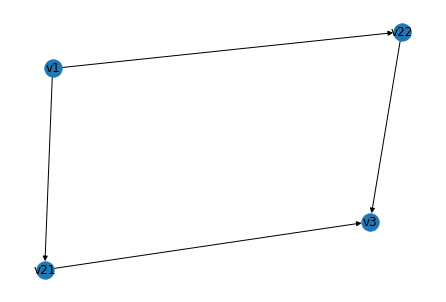

In [3]:
# print(g.get_vertexs())
# print(g.get_edges())
# print(g.get_sources())
# print(g.get_sinks())
import networkx as nx
nx.draw(g.g, with_labels=True)

In [4]:
import min_cut
importlib.reload(min_cut)

<module 'min_cut' from 'd:\\Graduate2\\repo\\simple-sim\\algo\\min_cut.py'>

In [5]:
s_cut, t_cut = min_cut.min_cut(g)
print(s_cut, t_cut)
s_graph = g.sub_graph(s_cut, gen_uuid())
t_graph = g.sub_graph(t_cut, gen_uuid())

{'v21', 'v1'} {'v22', 'v3'}


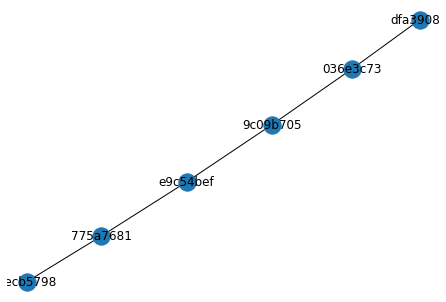

In [6]:
import networkx as nx
import yaml
import topo
importlib.reload(topo)
data = yaml.load(open('../samples/a0.yaml', 'r').read(), Loader=yaml.Loader)
sc = topo.Scenario.from_dict(data)
nx.draw(sc.topo.g, with_labels=True)

In [7]:
import schedule as sch
importlib.reload(sch)
edge_random_scheduler = sch.RandomScheduler(sc.get_edge_domains()[0].topo)
cloud_random_scheduler = sch.RandomScheduler(sc.get_cloud_domains()[0].topo)
sr1 = edge_random_scheduler.schedule(s_graph)
sr2 = cloud_random_scheduler.schedule(t_graph)
global_random_scheduler = sch.RandomScheduler(sc.topo)
comp_sr = global_random_scheduler.schedule(g)

2021-08-20 13:07:48 Vancior-Redmi RandomScheduler[24256] DEBUG Select node dfa39081 for vertex v1
2021-08-20 13:07:48 Vancior-Redmi RandomScheduler[24256] DEBUG Select node dfa39081 for vertex v21
2021-08-20 13:07:48 Vancior-Redmi RandomScheduler[24256] DEBUG Select node eecb5798 for vertex v22
2021-08-20 13:07:48 Vancior-Redmi RandomScheduler[24256] DEBUG Select node eecb5798 for vertex v3
2021-08-20 13:07:48 Vancior-Redmi RandomScheduler[24256] DEBUG Select node dfa39081 for vertex v1
2021-08-20 13:07:48 Vancior-Redmi RandomScheduler[24256] DEBUG Select node dfa39081 for vertex v22
2021-08-20 13:07:48 Vancior-Redmi RandomScheduler[24256] DEBUG Select node dfa39081 for vertex v21
2021-08-20 13:07:48 Vancior-Redmi RandomScheduler[24256] DEBUG Select node eecb5798 for vertex v3


In [8]:
calculator = sch.LatencyCalculator(sc.topo)
result = sch.SchedulingResult.merge(sr1, sr2)
calculator.add_scheduled_graph(g, result)
print(calculator.compute_latency())
sc.topo.clear_occupied()

2021-08-20 13:07:49 Vancior-Redmi LatencyCalculator[24256] DEBUG vertex v1: [], com 1
2021-08-20 13:07:49 Vancior-Redmi LatencyCalculator[24256] DEBUG vertex v22: [('v1', 1, 70, 0)], com 2
2021-08-20 13:07:49 Vancior-Redmi LatencyCalculator[24256] DEBUG vertex v21: [('v1', 1, 0, 0)], com 1
2021-08-20 13:07:49 Vancior-Redmi LatencyCalculator[24256] DEBUG vertex v3: [('v21', 2.0, 70, 0), ('v22', 73.0, 0, 0)], com 2


{'4b337fd5': 74.5}


In [9]:
comp_cal = sch.LatencyCalculator(sc.topo)
comp_cal.add_scheduled_graph(g, comp_sr)
print(comp_cal.compute_latency())

2021-08-20 13:07:49 Vancior-Redmi LatencyCalculator[24256] DEBUG vertex v1: [], com 1
2021-08-20 13:07:49 Vancior-Redmi LatencyCalculator[24256] DEBUG vertex v22: [('v1', 1, 0, 0)], com 1
2021-08-20 13:07:49 Vancior-Redmi LatencyCalculator[24256] DEBUG vertex v21: [('v1', 1, 0, 0)], com 1
2021-08-20 13:07:49 Vancior-Redmi LatencyCalculator[24256] DEBUG vertex v3: [('v21', 2.0, 70, 0), ('v22', 2.0, 70, 0)], com 2


{'4b337fd5': 74.0}
